In [82]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/income-inequality-data/data.csv


## **Import library**

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

import warnings
warnings.filterwarnings('ignore')

import missingno as mssno
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE,SMOTENC,RandomOverSampler
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix,RocCurveDisplay,roc_curve,roc_auc_score

from sklearn.feature_selection import mutual_info_classif,SelectKBest,chi2,f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import joblib

In [84]:
df = pd.read_csv("/kaggle/input/income-inequality-data/data.csv")

In [85]:
df.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


In [86]:
df.tail()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
209494,ID_TZ99995,16,Female,7th and 8th grade,NaN,High school,Never married,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,Canada,?,?,?,?,NaN,NaN,NaN,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,NaN,NaN,Never married,White,All other,Children or Armed Forces,...,US,?,?,?,?,NaN,NaN,NaN,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3530.26,Below limit
209498,ID_TZ99999,19,Male,11th grade,Local government,High school,Never married,Black,All other,Children or Armed Forces,...,US,MSA to MSA,Same,Same county,Same county,No,South,Florida,1987.72,Below limit


In [87]:
print("Total Rows = ", df.shape[0])
print("Total Columns = ", df.shape[1])

Total Rows =  209499
Total Columns =  43


# <span style="font-family:cursive;text-align:center">📊 Exploratory Data Analysis</span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>To check shape of the dataframe use .shape() function which return (rows,columns)</b><br>
    📌 &nbsp;<b>To see the name of columns use .columns function which returns name of columns as a list</b><br>
</div>

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [89]:
df.describe(exclude=object).T

,count,mean,std,min,25%,50%,75%,max
age,209499.0,34.518728,22.306738,0.00,15.00,33.00,50.00,90.0
employment_stat,209499.0,0.176760,0.555562,0.00,0.00,0.00,0.00,2.0
wage_per_hour,209499.0,55.433487,276.757327,0.00,0.00,0.00,0.00,9999.0
working_week_per_year,209499.0,23.158850,24.397963,0.00,0.00,8.00,52.00,52.0
industry_code,209499.0,15.332398,18.049655,0.00,0.00,0.00,33.00,51.0
occupation_code,209499.0,11.321734,14.460839,0.00,0.00,0.00,26.00,46.0
total_employed,209499.0,1.956067,2.365154,0.00,0.00,1.00,4.00,6.0
vet_benefit,209499.0,1.515854,0.850853,0.00,2.00,2.00,2.00,2.0
gains,209499.0,435.926887,4696.359500,0.00,0.00,0.00,0.00,99999.0
losses,209499.0,36.881737,270.383302,0.00,0.00,0.00,0.00,4608.0


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b> Droping the ID column because it have unique values.</b><br>

In [90]:
# droping the ID column
df = df.drop(['ID'], axis=1)

In [91]:
numerical_feature = df.select_dtypes(exclude=object)
print("Numerical Features Names = ", numerical_feature.columns)
print("Numerical Features Count", len(numerical_feature.columns))

discrete_features=[col for col in numerical_feature.columns if len(df[col].unique())<25]
print("Discrete Numerical Features",len(discrete_features))
continous_features =  [ col for col in numerical_feature.columns if col not in discrete_features]
print("Continous Numerical Features",len(continous_features))

Numerical Features Names =  Index(['age', 'employment_stat', 'wage_per_hour', 'working_week_per_year',
       'industry_code', 'occupation_code', 'total_employed', 'vet_benefit',
       'gains', 'losses', 'stocks_status', 'mig_year', 'importance_of_record'],
      dtype='object')
Numerical Features Count 13
Discrete Numerical Features 4
Continous Numerical Features 9


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* Dataset have 
    
    13 Numerical features Column, 
    
    4 Discreate Numerical features Column,  
    
    9 Continous Numerical features Column

In [92]:
categorical_features = df.select_dtypes(include=object)
print("Categorical Feature Names =", categorical_features.columns)
print("Categorical Feature count =", len(categorical_features.columns))

Categorical Feature Names = Index(['gender', 'education', 'class', 'education_institute', 'marital_status',
       'race', 'is_hispanic', 'employment_commitment', 'unemployment_reason',
       'is_labor_union', 'industry_code_main', 'occupation_code_main',
       'household_stat', 'household_summary', 'under_18_family',
       'veterans_admin_questionnaire', 'tax_status', 'citizenship',
       'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'income_above_limit'],
      dtype='object')
Categorical Feature count = 29


In [93]:
df.replace(" ?", np.NAN, inplace=True)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>.isna(): Detect missing values.</b><br>
</div>

In [94]:
df.isna().sum().sort_values(ascending=False)

veterans_admin_questionnaire      207415
unemployment_reason               202979
education_institute               196197
old_residence_state               193889
migration_prev_sunbelt            193148
old_residence_reg                 193148
is_labor_union                    189420
under_18_family                   151654
migration_code_change_in_reg      106284
residence_1_year_ago              106284
migration_code_move_within_reg    106284
migration_code_change_in_msa      106284
occupation_code_main              105694
class                             105245
country_of_birth_father             7181
country_of_birth_mother             6516
country_of_birth_own                3667
tax_status                             0
mig_year                               0
citizenship                            0
stocks_status                          0
losses                                 0
importance_of_record                   0
gains                                  0
age             

In [95]:
column_with_null = df.columns[df.isnull().any()]
total_column_with_null = len(column_with_null)

print("Total columns that have at least one null column = ", total_column_with_null)

Total columns that have at least one null column =  17


In [96]:
def missing_val_column(df):
    missing = pd.DataFrame(round((df.isna().sum().sort_values(ascending=False) / df.shape[0]) * 100, 2), columns=['% Missing'])
    return missing[missing["% Missing"]>0]

missing_val_column(df)

,% Missing
veterans_admin_questionnaire,99.01
unemployment_reason,96.89
education_institute,93.65
old_residence_state,92.55
migration_prev_sunbelt,92.20
old_residence_reg,92.20
is_labor_union,90.42
under_18_family,72.39
migration_code_change_in_reg,50.73
residence_1_year_ago,50.73


In [97]:
def plot_count(df):
    # checking the target
    plt.figure(figsize=(14, 7))
    
    # Barplot
    ax1 = plt.subplot(1, 2, 1)
    cp = sns.countplot(x=df["income_above_limit"])

    # Add count numbers on top of the bars
    for p in ax1.patches:
        ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=14)

    ax1.set_xlabel(" ")
    ax1.set_ylabel(" ")
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    sns.despine(top=True, right=True)

    # Pieplot
    ax2 = plt.subplot(1, 2, 2)
    plt.pie(df["income_above_limit"].value_counts(),
            labels=list(df["income_above_limit"].unique()),
            autopct='%1.2f%%',
            pctdistance=0.8,
            shadow=True,
            radius=1.3,
            textprops={'fontsize': 14},
            explode=[0.3, 0]
            )
    ax2.set_xlabel(" ")
    plt.xlabel('Composition of "income_above_limit"', fontsize=15, labelpad=20)
    plt.subplots_adjust(wspace=0.4)
    plt.show()

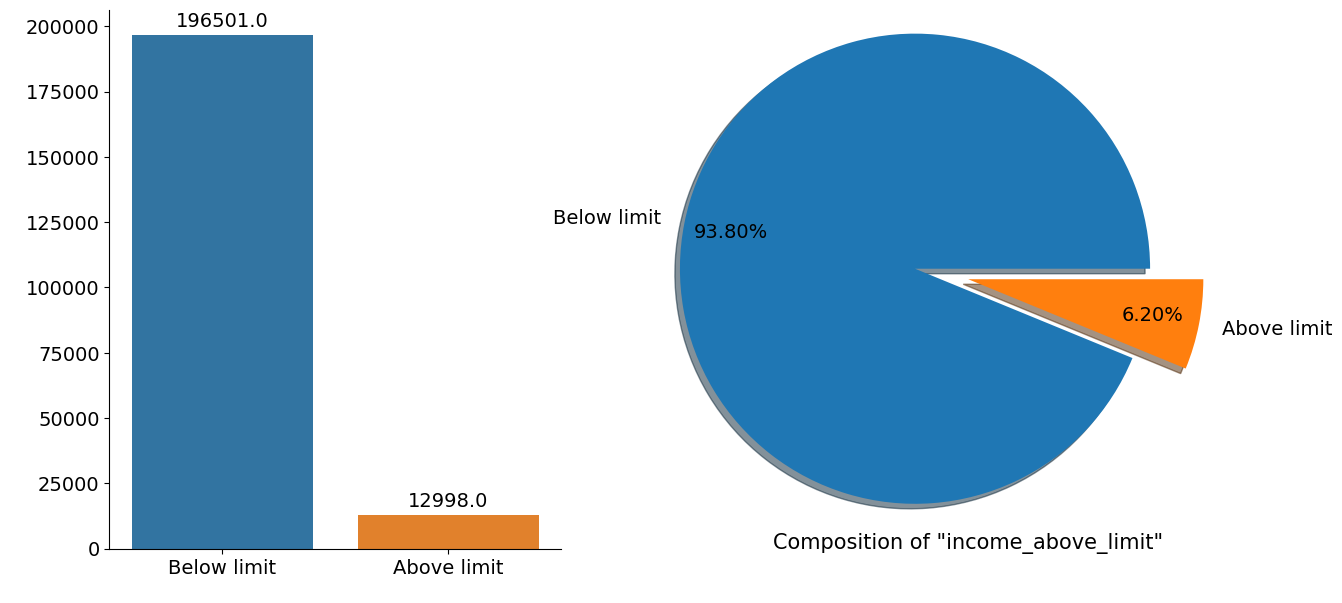

In [98]:
plot_count(df)

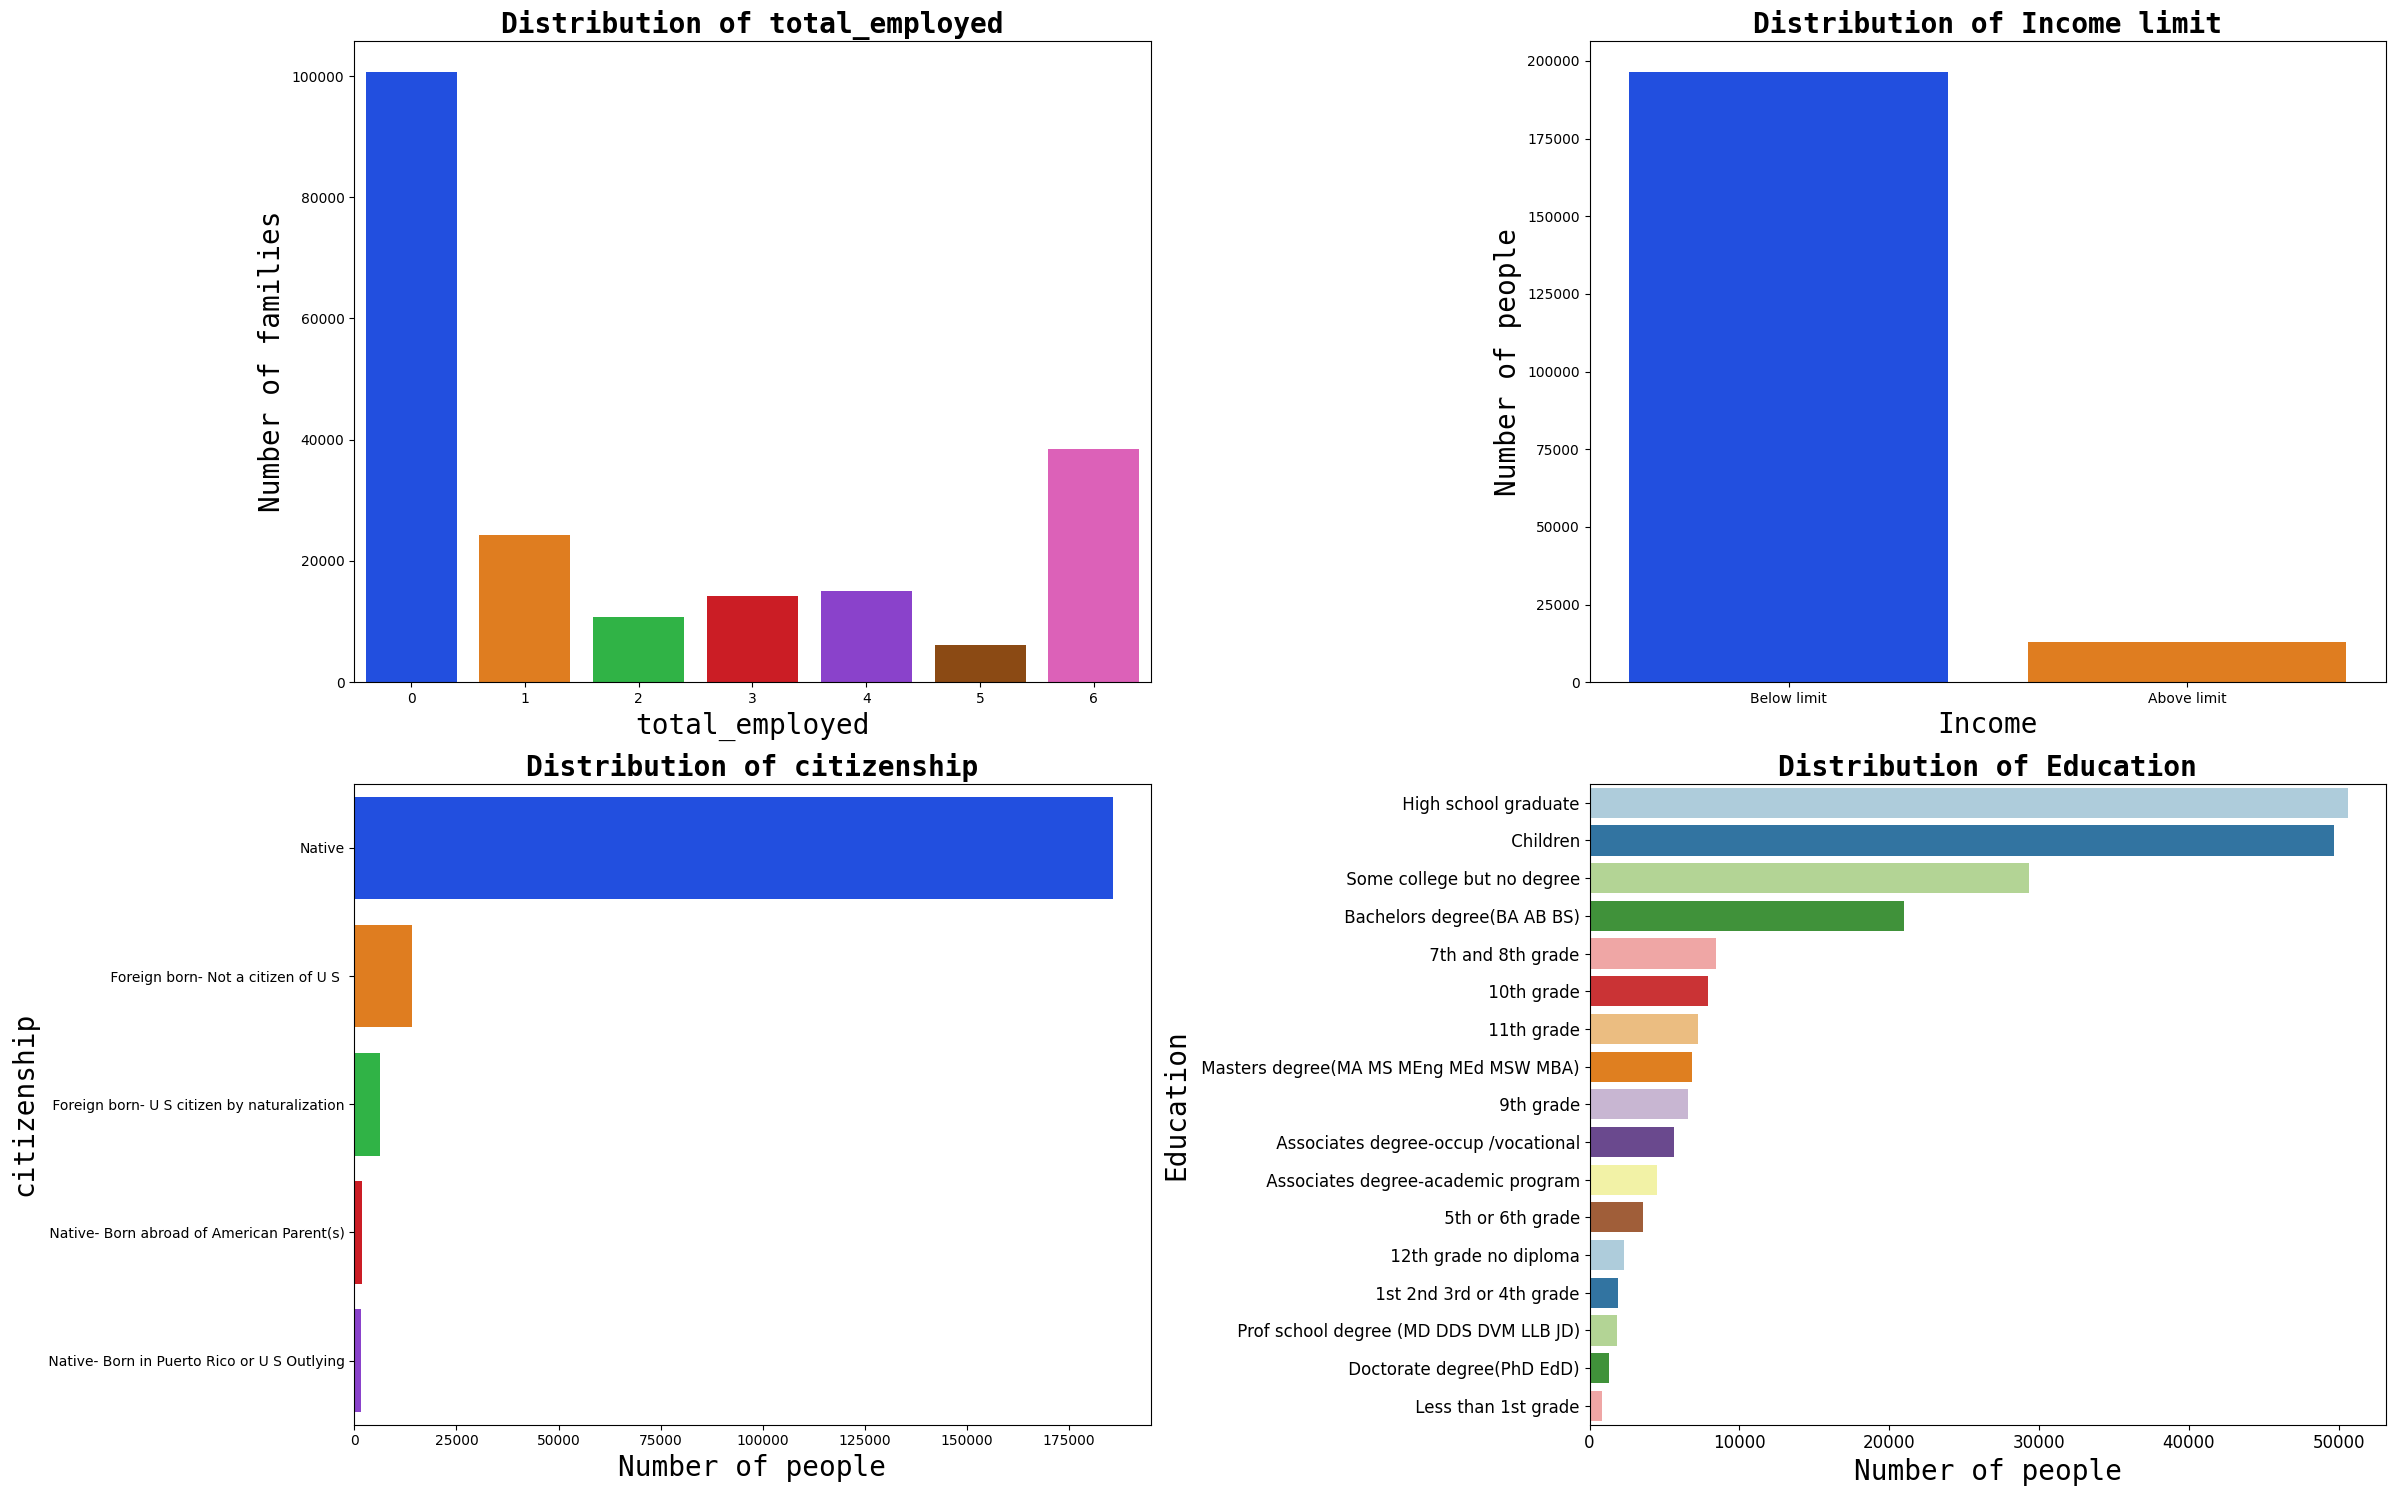

In [99]:
fig, axs = plt.subplots(2, 2, figsize=(24, 15))

# Distribution of total_employed
total_employed = df['total_employed'].value_counts()
sns.barplot(x=total_employed.index, y=total_employed.values, palette='bright', ax=axs[0,0])
axs[0,0].set_title('Distribution of total_employed', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[0,0].set_xlabel('total_employed', fontdict={'fontname': 'Monospace', 'fontsize': 20})
axs[0,0].set_ylabel('Number of families', fontdict={'fontname': 'Monospace', 'fontsize': 20})
axs[0,0].tick_params(labelsize=10)

# Distribution of Income limit
income = df['income_above_limit'].value_counts()
sns.barplot(x=income.index, y=income.values, palette='bright', ax=axs[0,1])
axs[0,1].set_title('Distribution of Income limit', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[0,1].set_xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 20})
axs[0,1].set_ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 20})
axs[0,1].tick_params(labelsize=10)

citizenship = df['citizenship'].value_counts()
sns.barplot(y=citizenship.index,x=citizenship.values,palette='bright',ax=axs[1,0])
axs[1,0].set_title('Distribution of citizenship', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[1,0].set_ylabel('citizenship', fontdict={'fontname': 'Monospace', 'fontsize': 20})
axs[1,0].set_xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 20})
axs[1,0].tick_params(labelsize=10)

edu = df['education'].value_counts()
sns.barplot(x=edu.values, y=edu.index, palette='Paired',ax=axs[1,1])
axs[1,1].set_title('Distribution of Education', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[1,1].set_xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 20})
axs[1,1].set_ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 20})
axs[1,1].tick_params(labelsize=12)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [100]:
df1 = df.copy(deep=True)
df1['education'].value_counts()

education
High school graduate                      50627
Children                                  49685
Some college but no degree                29320
Bachelors degree(BA AB BS)                20979
7th and 8th grade                          8438
10th grade                                 7905
11th grade                                 7260
Masters degree(MA MS MEng MEd MSW MBA)     6861
9th grade                                  6540
Associates degree-occup /vocational        5650
Associates degree-academic program         4494
5th or 6th grade                           3542
12th grade no diploma                      2282
1st 2nd 3rd or 4th grade                   1917
Prof school degree (MD DDS DVM LLB JD)     1852
Doctorate degree(PhD EdD)                  1318
Less than 1st grade                         829
Name: count, dtype: int64

In [101]:
df1.replace({' 7th and 8th grade':'upto 12th',' Less than 1st grade':'upto 12th',
             ' 1st 2nd 3rd or 4th grade':'upto 12th',
            ' 5th or 6th grade':'upto 12th',' 9th grade':'upto 12th',' 11th grade':'upto 12th',
                ' 10th grade':'upto 12th',' 12th grade no diploma':'upto 12th'},inplace=True)

<Axes: ylabel='education'>

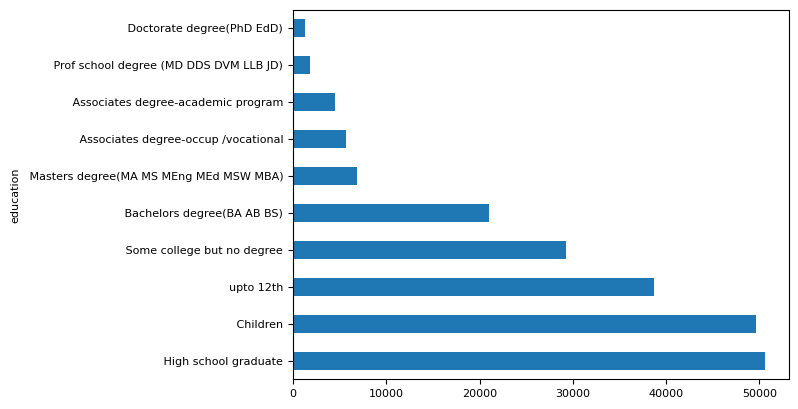

In [102]:
df1['education'].value_counts().plot(kind='barh')

In [103]:
print("Income below limit for people upto 12th:",len(df1[(df1['education']=='upto 12th') & (df1['income_above_limit']=='Below limit')])
/len(df1[df1['education']=='upto 12th'])*100)
print("Income Above limit for people upto 12th:",len(df1[(df1['education']=='upto 12th') & (df1['income_above_limit']=='Above limit')])
      /len(df1[df1['education']=='upto 12th'])*100)

Income below limit for people upto 12th: 99.111409604009
Income Above limit for people upto 12th: 0.8885903959910109


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* **99%** of people with education upto 12th are **under below income limit**
* only **0.88%** of people with education upto 12th are **above limit**

In [104]:
df['citizenship'].value_counts()

citizenship
Native                                          185669
 Foreign born- Not a citizen of U S              14127
 Foreign born- U S citizen by naturalization      6208
 Native- Born abroad of American Parent(s)        1924
 Native- Born in Puerto Rico or U S Outlying      1571
Name: count, dtype: int64

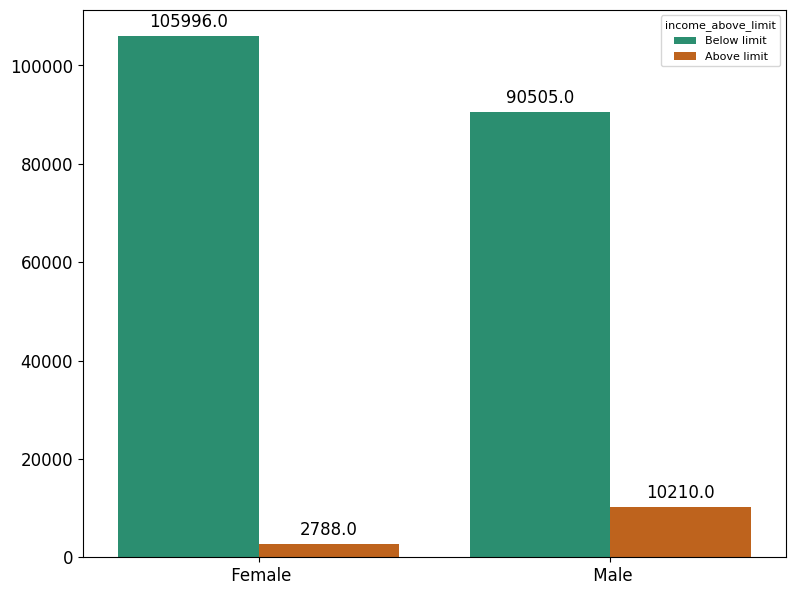

In [105]:
def plot_count_with_numbers(df, x_col, hue_col, palette='Dark2'):
    plt.figure(figsize=(8, 6))
    
    # Barplot
    ax = sns.countplot(x=x_col, hue=hue_col, data=df, palette=palette)

    # Add count numbers on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

plot_count_with_numbers(df, 'gender', 'income_above_limit')

In [106]:
print('Males with income below limit:',len(df.loc[(df['gender']==' Male') & (df['income_above_limit']=='Below limit')])/len(df.loc[(df['gender']==' Male')]) * 100, '%')
print('Females with income below limit:',len(df.loc[(df['gender']!=' Male') & (df['income_above_limit']=='Below limit')])/len(df.loc[(df['gender']!=' Male')]) * 100, '%')
print("----------------------------------------------")
print('Males with income above limit:',len(df.loc[(df['gender']==' Male') & (df['income_above_limit']=='Above limit')])/len(df.loc[(df['gender']==' Male')]) * 100, '%')
print('Females with income above limit:',len(df.loc[(df['gender']!=' Male') & (df['income_above_limit']=='Above limit')])/len(df.loc[(df['gender']!=' Male')]) * 100, '%')

Males with income below limit: 89.86248324479969 %
Females with income below limit: 97.43712310633916 %
----------------------------------------------
Males with income above limit: 10.137516755200318 %
Females with income above limit: 2.5628768936608326 %


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* Males and Females with income below limit is 89.8% and 97.4%
* Males and Females with income above limit is 10.1% and 2.5%

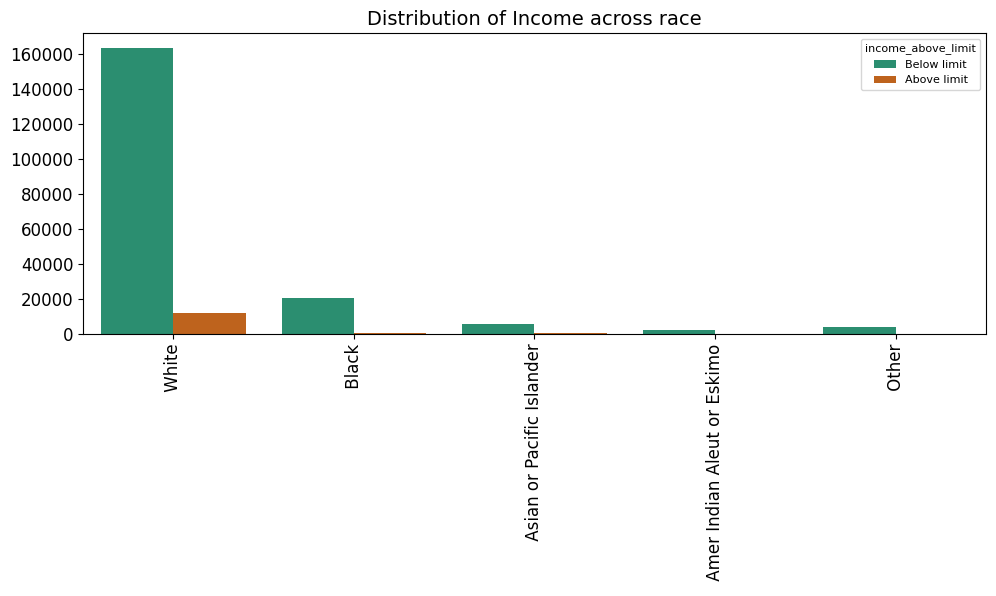

In [107]:
plt.figure(figsize=(10,6))
sns.countplot(x='race', hue='income_above_limit', data=df, palette='Dark2')
plt.xticks(fontsize=12)
plt.xticks(rotation=90)
plt.yticks(fontsize=12)
plt.title("Distribution of Income across race", fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

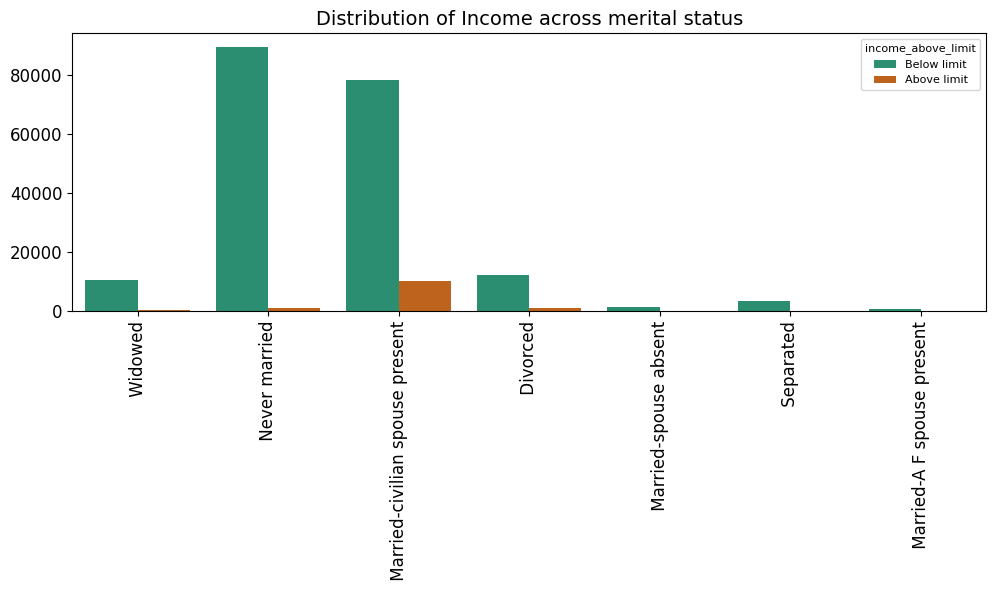

In [108]:
plt.figure(figsize=(10,6))
sns.countplot(x='marital_status', hue='income_above_limit', data=df, palette='Dark2')
plt.xticks(fontsize=12)
plt.xticks(rotation=90)
plt.yticks(fontsize=12)
plt.title("Distribution of Income across merital status", fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

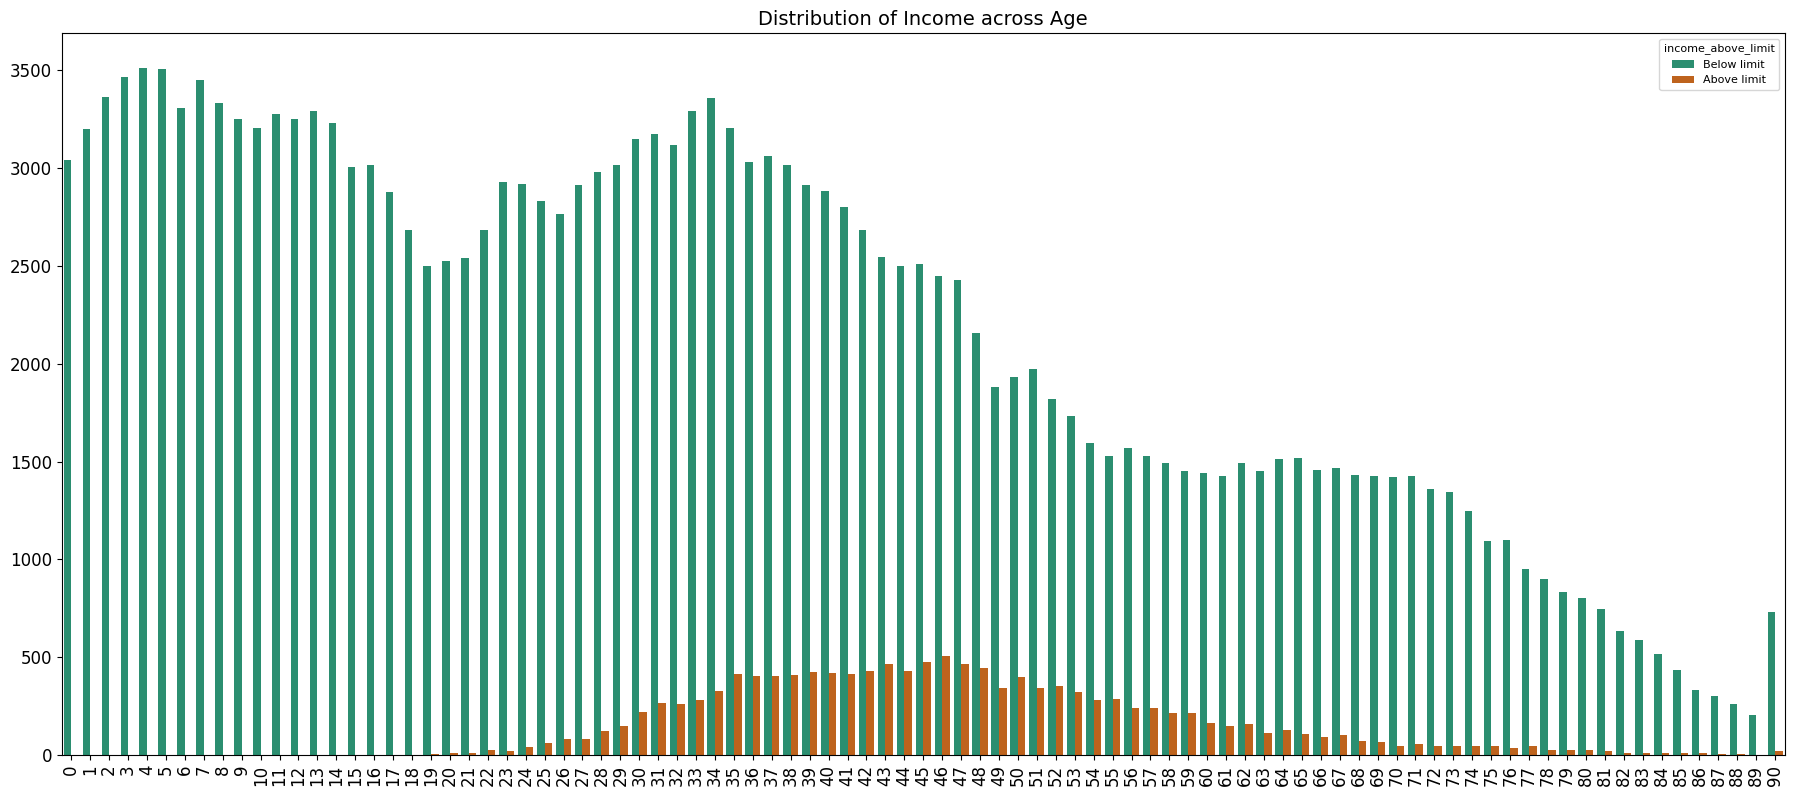

In [109]:
plt.figure(figsize=(18, 8))
sns.countplot(x='age', hue='income_above_limit', data=df, palette='Dark2')
plt.xticks(fontsize=12)
plt.xticks(rotation=90)
plt.yticks(fontsize=12)
plt.title("Distribution of Income across Age", fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* If the person age lie between 40 - 50 so most probability of income is above limit


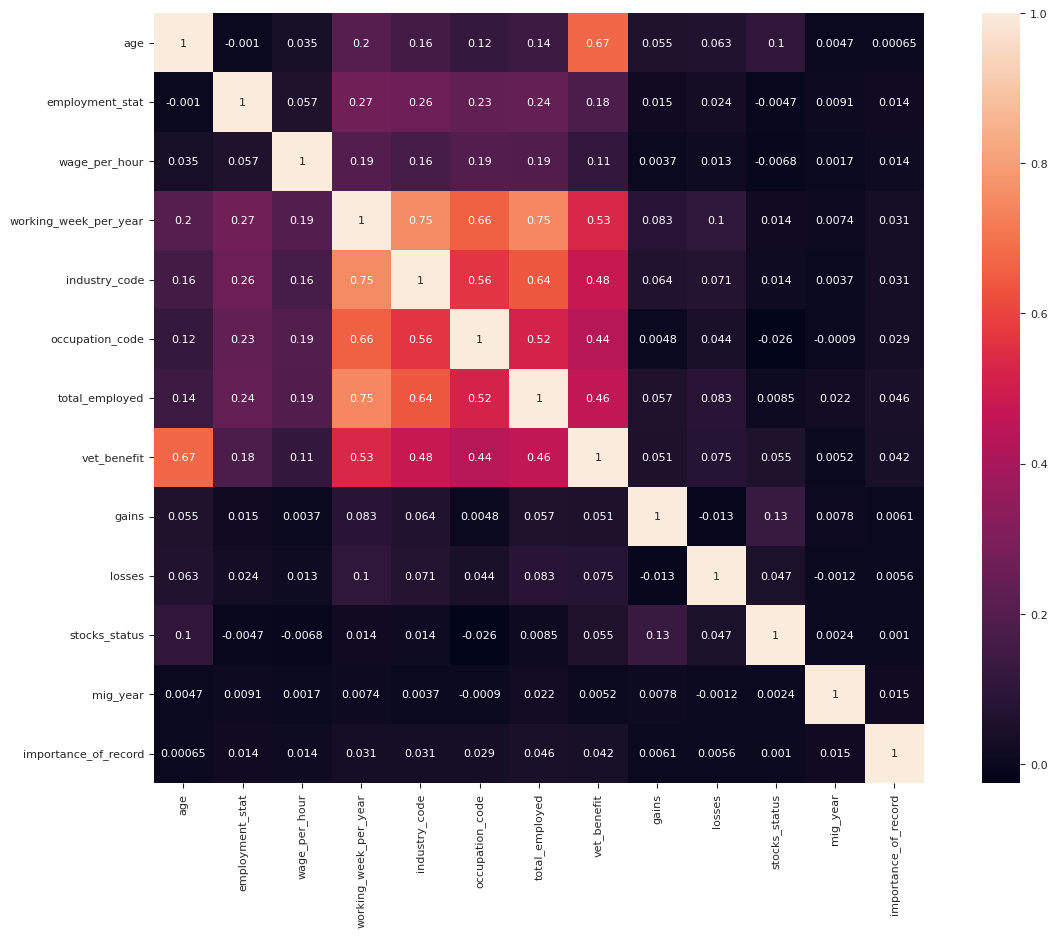

In [110]:
df_num=df.select_dtypes(exclude=object)
corr = df_num.corr(method='pearson')
with sns.axes_style("ticks"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(corr, square=True,annot=True)
plt.show()

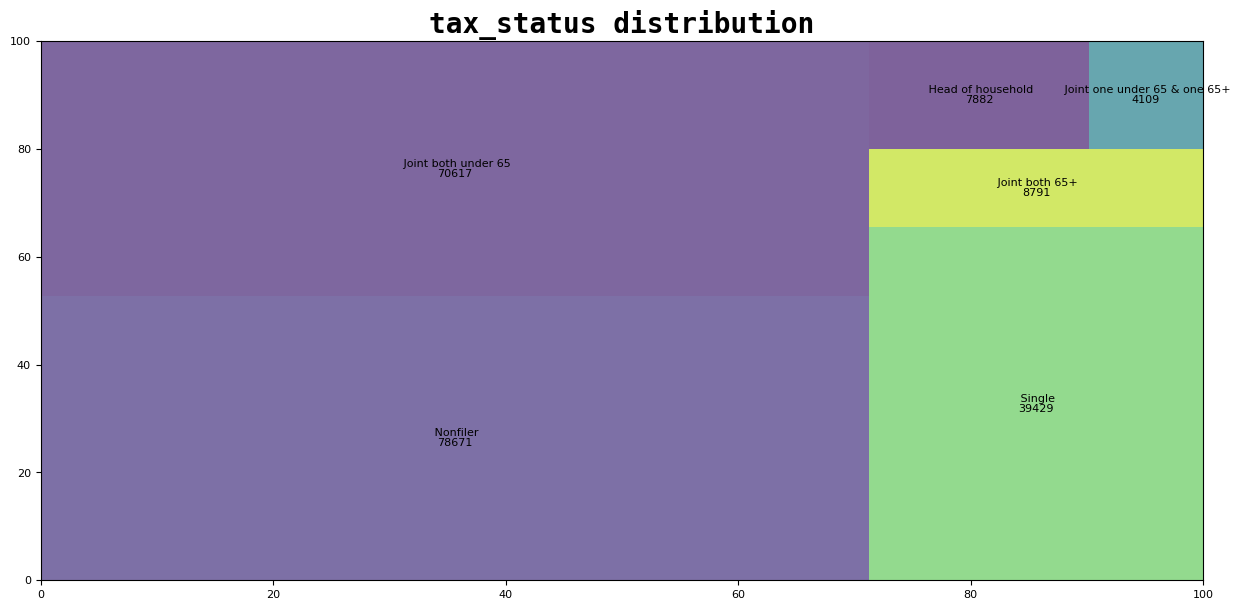

In [111]:
tax_status = df['tax_status'].value_counts()
plt.figure(figsize=(15, 7))
plt.rc('font', size=8)
squarify.plot(sizes=tax_status.values, label=tax_status.index, value=tax_status.values,alpha=0.7)
plt.title('tax_status distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()

# <span style="font-family:cursive;text-align:center">⚙️ Data Preprocessing</span>

### **Handling Missing Values**

In [112]:
missing_df = missing_val_column(df)
print(f"{len(missing_df)} Columns have missing values")

17 Columns have missing values


In [113]:
print(f"{missing_df[missing_df['% Missing']>50].shape[0]} Column(s) have missing values more than 50%")
missing_df[missing_df['% Missing']>50].index

14 Column(s) have missing values more than 50%


Index(['veterans_admin_questionnaire', 'unemployment_reason',
       'education_institute', 'old_residence_state', 'migration_prev_sunbelt',
       'old_residence_reg', 'is_labor_union', 'under_18_family',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'migration_code_move_within_reg', 'migration_code_change_in_msa',
       'occupation_code_main', 'class'],
      dtype='object')

In [114]:
## Dropping columns having missing values greater than 50%
columns_to_drop=['class', 'education_institute', 'unemployment_reason', 'is_labor_union',
       'occupation_code_main', 'under_18_family',
       'veterans_admin_questionnaire', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state']

In [115]:
print('The shape of data before dropping columns with high proportion of NaN values is - ')
print(f'The shape of data is {df.shape}')

df = df.drop(columns_to_drop,axis=1)

print('---------------------------------------------------------------------------------------------------\n')
print('The shape of data after dropping columns with high proportion of NaN values is - ')
print(f'The shape of data is {df.shape}')

The shape of data before dropping columns with high proportion of NaN values is - 
The shape of data is (209499, 42)
---------------------------------------------------------------------------------------------------

The shape of data after dropping columns with high proportion of NaN values is - 
The shape of data is (209499, 28)


In [116]:
missing_val_column(df)

,% Missing
country_of_birth_father,3.43
country_of_birth_mother,3.11
country_of_birth_own,1.75


*** Country of birth own, father, mother are not important features that may have any affect on model**

In [117]:
# dropping the birth father, mother, own columns 
df = df.drop(['country_of_birth_own','country_of_birth_father','country_of_birth_mother'],axis=1)

In [118]:
len(missing_val_column(df))

0

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* Now there is no column have null values in dataset


In [119]:
df.shape

(209499, 25)

### Dealing with Outliers

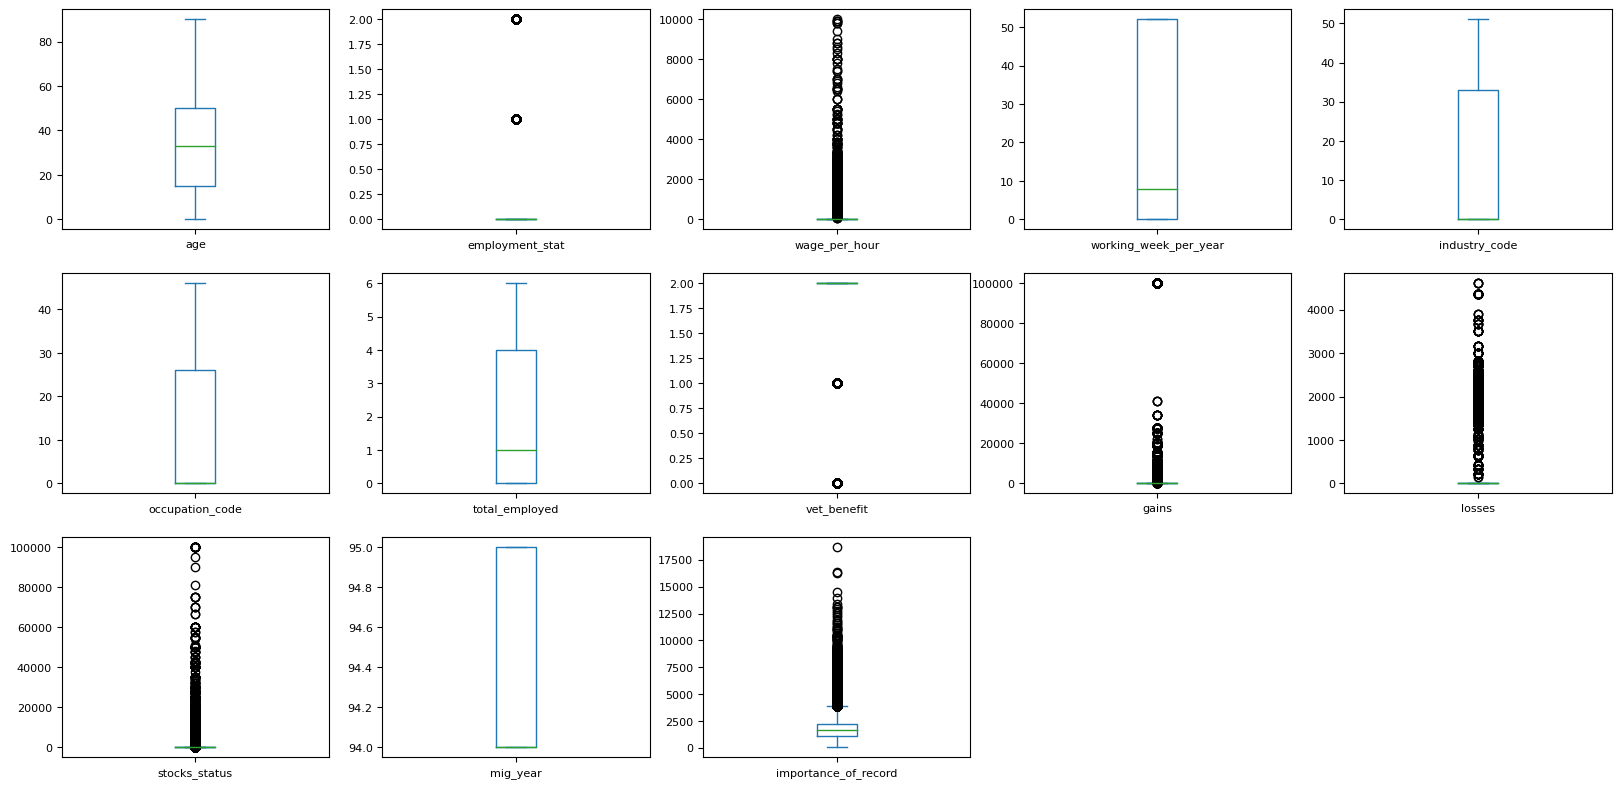

In [120]:
df.plot(kind="box", 
                vert=True,
                subplots=True, 
                layout = (6,5), 
                figsize=(20,20), 
                sharex=False, 
                sharey=False);

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* There are some features that have most outliers 'wage_per_hour', 'gains', 'losses', 'stock_status', 'importance_of_record'
* Some of the possible ways to tackle this outlier is to transform values, clip values, drop values or to retain information
* Clipping doesn't seem nice option as it will delete the correct information
* We will check the number of outliers per column to see what can be done


In [121]:
for i in ['wage_per_hour','gains','losses','stocks_status','importance_of_record']:
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)
    lower=df[i].quantile(0.25)-(IQR*1.5)
    upper=df[i].quantile(0.75)+(IQR*1.5)
    
    outliers=[]
    
    for j in df[i]:
        if j<lower:
            outliers.append(j)
    for k in df[i]:
        if k>upper:
            outliers.append(k)
    print(f'The percentage of outliers in {i}:',(len(outliers)/len(df)*100),'%')
    

The percentage of outliers in wage_per_hour: 5.659215557114831 %
The percentage of outliers in gains: 3.7374880071026593 %
The percentage of outliers in losses: 1.9389114029183911 %
The percentage of outliers in stocks_status: 10.516517978606103 %
The percentage of outliers in importance_of_record: 3.22626838314264 %


In [122]:
df.sample(5)

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,...,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record,income_above_limit
199364,48,Female,Bachelors degree(BA AB BS),Married-spouse absent,Asian or Pacific Islander,All other,Not in labor force,0,0,0,...,Householder,2,Nonfiler,0,0,0,Foreign born- Not a citizen of U S,95,1157.60,Below limit
119089,53,Female,Some college but no degree,Married-civilian spouse present,White,All other,Children or Armed Forces,0,0,40,...,Spouse of householder,2,Joint both under 65,0,0,0,Native,94,246.33,Below limit
90863,48,Female,Associates degree-occup /vocational,Divorced,White,All other,Full-time schedules,0,0,52,...,Householder,2,Single,0,0,101,Native,95,3532.44,Below limit
67360,2,Female,Children,Never married,White,All other,Children or Armed Forces,0,0,0,...,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,968.77,Below limit
49886,28,Female,High school graduate,Divorced,White,All other,PT for econ reasons usually FT,0,0,52,...,Householder,2,Head of household,0,0,0,Native,95,2290.38,Below limit


In [123]:
df = df.drop(['household_stat'], axis=1)

### handling imbalaced data

In [124]:
print("Value count of income limit:")
print(df['income_above_limit'].value_counts())
print("----------------------------------")
print(" Income limit data percentage:")
print(df['income_above_limit'].value_counts(normalize=True)*100)

Value count of income limit:
income_above_limit
Below limit    196501
Above limit     12998
Name: count, dtype: int64
----------------------------------
 Income limit data percentage:
income_above_limit
Below limit    93.795674
Above limit     6.204326
Name: proportion, dtype: float64


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* We can see clearly highly imbalance data have in dataset so we need to performe options to imbalance the data


### Fixing imbalanced dataset using Oversampling

In [125]:
X = df.drop(['income_above_limit'], axis=1)
y = df['income_above_limit']

In [126]:
print(X.shape)
print(y.shape)

(209499, 23)
(209499,)


In [127]:
#creating the column_name index dictionary
cat_col_index={col_name:i for i,col_name in enumerate(X.columns) if col_name in categorical_features.columns}

list(cat_col_index.values())

[1, 2, 3, 4, 5, 6, 11, 14, 16, 20]

In [128]:
oversampling=SMOTENC(categorical_features=list(cat_col_index.values()),random_state=37)

In [129]:
X_resampled, y_resampled = oversampling.fit_resample(X,y)

In [130]:
print(X_resampled.shape)
print(y_resampled.shape)

(393002, 23)
(393002,)


In [131]:
y_resampled.value_counts()

income_above_limit
Below limit    196501
Above limit    196501
Name: count, dtype: int64

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* We can see clearly data is **Balanced**


### Train-Test Split

In [132]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=57)

In [133]:
print(f"shape of training dataset{X_train.shape}")
print(f"shape of testing dataset{X_test.shape}")

shape of training dataset(275101, 23)
shape of testing dataset(117901, 23)


In [134]:
X_train.head()

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,...,total_employed,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record
180747,38,Male,Associates degree-academic program,Never married,Black,All other,Children or Armed Forces,0,0,52,...,1,Householder,2,Single,0,0,0,Native,94,1161.50
45798,88,Female,5th or 6th grade,Widowed,Black,All other,Children or Armed Forces,0,0,0,...,0,Householder,2,Nonfiler,0,0,0,Native,94,1045.59
67252,7,Male,Children,Never married,White,All other,Children or Armed Forces,0,0,0,...,0,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,2581.22
95622,29,Male,Masters degree(MA MS MEng MEd MSW MBA),Married-civilian spouse present,Black,All other,Children or Armed Forces,0,0,52,...,4,Spouse of householder,2,Joint both under 65,0,0,0,Native,94,1692.78
142101,41,Male,Some college but no degree,Married-civilian spouse present,White,All other,Full-time schedules,0,0,52,...,5,Householder,2,Joint both under 65,0,0,0,Native,95,1274.45


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* We can see that indexing is very unorder so we need to fix it 

In [135]:
X_train.reset_index(drop=True,inplace=True)
X_train.head()

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,...,total_employed,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record
0,38,Male,Associates degree-academic program,Never married,Black,All other,Children or Armed Forces,0,0,52,...,1,Householder,2,Single,0,0,0,Native,94,1161.50
1,88,Female,5th or 6th grade,Widowed,Black,All other,Children or Armed Forces,0,0,0,...,0,Householder,2,Nonfiler,0,0,0,Native,94,1045.59
2,7,Male,Children,Never married,White,All other,Children or Armed Forces,0,0,0,...,0,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,2581.22
3,29,Male,Masters degree(MA MS MEng MEd MSW MBA),Married-civilian spouse present,Black,All other,Children or Armed Forces,0,0,52,...,4,Spouse of householder,2,Joint both under 65,0,0,0,Native,94,1692.78
4,41,Male,Some college but no degree,Married-civilian spouse present,White,All other,Full-time schedules,0,0,52,...,5,Householder,2,Joint both under 65,0,0,0,Native,95,1274.45


In [136]:
X_test.reset_index(drop=True,inplace=True)
X_test.head()

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,...,total_employed,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record
0,50,Female,High school graduate,Married-civilian spouse present,White,All other,Children or Armed Forces,0,0,52,...,6,Spouse of householder,2,Joint both under 65,0,0,0,Native,94,1008.050000
1,76,Female,Some college but no degree,Widowed,White,All other,Not in labor force,0,0,0,...,0,Householder,2,Single,0,0,8000,Native,95,1237.330000
2,58,Male,Bachelors degree(BA AB BS),Married-civilian spouse present,White,All other,Children or Armed Forces,0,0,48,...,6,Householder,1,Joint both under 65,0,0,409,Native,95,3199.601328
3,45,Male,High school graduate,Married-civilian spouse present,White,All other,Children or Armed Forces,0,0,44,...,6,Householder,2,Joint both under 65,0,1902,131,Native,94,1094.013329
4,41,Female,High school graduate,Married-civilian spouse present,White,All other,Children or Armed Forces,0,0,40,...,5,Spouse of householder,2,Joint both under 65,0,0,0,Native,94,1920.410000


# Feature Engineering

In [137]:
y_train_encoded=y_train.replace({'Below limit':0,'Above limit':1})
y_test_encoded=y_test.replace({'Below limit':0,'Above limit':1})

In [138]:
# function which applies oridinal encoding to the categorcial columns before performing fetaure selection
def feature_ordinal_encoding(X_train,X_test):
    X_train_cat=X_train.select_dtypes(include=object)
    X_test_cat=X_test.select_dtypes(include=object)
    oe=OrdinalEncoder()
    X_train_oe=oe.fit_transform(X_train_cat)
    X_test_oe=oe.fit_transform(X_test_cat)
    X_train_oe=pd.DataFrame(X_train_oe,columns=X_train_cat.columns)
    X_test_oe =pd.DataFrame(X_test_oe,columns=X_test_cat.columns)
    return X_train_oe,X_test_oe

# function performs feature selection on ordinal encoded categororical columns
def feature_selection(X,y,score_func):
    feat=SelectKBest(score_func=score_func,k=5)
    feat.fit(X,y)
    feature_columns=feat.get_feature_names_out(feat.feature_names_in_)
    return feature_columns
X_train_oe,X_test_oe=feature_ordinal_encoding(X_train,X_test)

In [139]:
print("Categorical Features selected-Training data:",feature_selection(X_train_oe,y_train_encoded,chi2))
print("Categorical Features selected-Testing data:",feature_selection(X_test_oe,y_test_encoded,chi2))

Categorical Features selected-Training data: ['gender' 'education' 'marital_status' 'is_hispanic' 'tax_status']
Categorical Features selected-Testing data: ['gender' 'education' 'marital_status' 'is_hispanic' 'tax_status']


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
*  'gender', 'education', 'marital_status', 'is_hispanic','tax_status' these are the categorical features selected from chi-square test

In [140]:
X_train_num=X_train.select_dtypes(exclude=object)
X_test_num=X_test.select_dtypes(exclude=object)
print("Numerical Features selected-Training data:",feature_selection(X_train_num,y_train_encoded,f_classif))
print("Numerical Features selected-Testing data:",feature_selection(X_test_num,y_test_encoded,f_classif))

Numerical Features selected-Training data: ['age' 'working_week_per_year' 'industry_code' 'total_employed'
 'vet_benefit']
Numerical Features selected-Testing data: ['age' 'working_week_per_year' 'industry_code' 'total_employed'
 'vet_benefit']


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
*  'age' 'working_week_per_year' 'industry_code' 'total_employed''vet_benefit' these are the numerical features selected from chi-square test

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* Final Observations from feature Selections:
    
    ['gender','education', 'marital_status', 'is_hispanic','tax_status','age' 'working_week_per_year'] these above columns make sense in building an affective model . So going forward choosing the above features for further processing


In [141]:
X_train=X_train[['gender','education', 'marital_status', 'is_hispanic',
                 'tax_status','age', 'working_week_per_year','total_employed','vet_benefit']]
X_test=X_test[['gender','education', 'marital_status', 'is_hispanic',
                 'tax_status','age', 'working_week_per_year','total_employed','vet_benefit']]
print("Training data shape",X_train.shape)
print("Testing data shape",X_test.shape)

Training data shape (275101, 9)
Testing data shape (117901, 9)


In [142]:
X_train.head()

,gender,education,marital_status,is_hispanic,tax_status,age,working_week_per_year,total_employed,vet_benefit
0,Male,Associates degree-academic program,Never married,All other,Single,38,52,1,2
1,Female,5th or 6th grade,Widowed,All other,Nonfiler,88,0,0,2
2,Male,Children,Never married,All other,Nonfiler,7,0,0,0
3,Male,Masters degree(MA MS MEng MEd MSW MBA),Married-civilian spouse present,All other,Joint both under 65,29,52,4,2
4,Male,Some college but no degree,Married-civilian spouse present,All other,Joint both under 65,41,52,5,2


In [143]:
y_train.head()

180747    Below limit
45798     Below limit
67252     Below limit
95622     Below limit
142101    Below limit
Name: income_above_limit, dtype: object

In [144]:
numerical_features=X_train.select_dtypes(exclude=object)
print("Numerical columns: ", numerical_features.columns)

categorical_features=X_train.select_dtypes(include=object)
print("\nCategorical columns: ", categorical_features.columns)

Numerical columns:  Index(['age', 'working_week_per_year', 'total_employed', 'vet_benefit'], dtype='object')

Categorical columns:  Index(['gender', 'education', 'marital_status', 'is_hispanic', 'tax_status'], dtype='object')


In [145]:
cat_columns=['gender', 'education', 'marital_status', 'is_hispanic', 'tax_status']
## OHe encoder
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
# encode on train data
X_train_encoded=encoder.fit_transform(X_train[cat_columns])
X_train_encoded=pd.DataFrame(X_train_encoded,columns=encoder.get_feature_names_out(cat_columns))
X_train_encoded=pd.concat([X_train[numerical_features.columns],X_train_encoded],axis=1)
X_train_encoded.shape

(275101, 46)

In [146]:
# encode on test data
X_test_encoded=encoder.transform(X_test[cat_columns])
X_test_encoded=pd.DataFrame(X_test_encoded,columns=encoder.get_feature_names_out(cat_columns))
X_test_encoded=pd.concat([X_test[numerical_features.columns],X_test_encoded],axis=1)
X_test_encoded.shape

(117901, 46)

In [147]:
X_test_encoded.head()

,age,working_week_per_year,total_employed,vet_benefit,gender_ Female,gender_ Male,education_ 10th grade,education_ 11th grade,education_ 12th grade no diploma,education_ 1st 2nd 3rd or 4th grade,...,is_hispanic_ Mexican-American,is_hispanic_ NA,is_hispanic_ Other Spanish,is_hispanic_ Puerto Rican,tax_status_ Head of household,tax_status_ Joint both 65+,tax_status_ Joint both under 65,tax_status_ Joint one under 65 & one 65+,tax_status_ Nonfiler,tax_status_ Single
0,50,52,6,2,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,76,0,0,2,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,58,48,6,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,45,44,6,2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,41,40,5,2,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Model Evaluation

In [148]:
models={
    "LR":LogisticRegression(),
    "Knnclassifier":KNeighborsClassifier(),
    "dt":DecisionTreeClassifier(),
    "rf":RandomForestClassifier()
}

In [149]:
def model_evalutions(models,X_train,X_test,y_train,y_test,params=None):
    f1_dict=dict()
    final_models=dict()
    for i in range(len(list(models))):
        ## Fit the model
        model=list(models.values())[i]
        model.fit(X_train,y_train)
        final_models[list(models.keys())[i]]=model
        ## prediction with unseen data
        y_pred=model.predict(X_test)
        f1_dict[list(models.keys())[i]]=f1_score(y_test,y_pred)
    return f1_dict,final_models

In [150]:
f1_score_dict,final_models=model_evalutions(models,X_train_encoded,X_test_encoded,y_train_encoded,
                                            y_test_encoded)

In [151]:
final_models

{'LR': LogisticRegression(),
 'Knnclassifier': KNeighborsClassifier(),
 'dt': DecisionTreeClassifier(),
 'rf': RandomForestClassifier()}

In [152]:
f1_score_dict

{'LR': 0.8945164181536706,
 'Knnclassifier': 0.8874271660366769,
 'dt': 0.8966952081761892,
 'rf': 0.9057045183080028}

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* Out of all Classifier Algo **Random Forest Algorithm** perform best
* Performing Hyper-Parameter tunning inorder to improve the accuracy

In [153]:
params={
 'max_depth': [40,50,60],
 'min_samples_leaf': [2],
 'min_samples_split': [10],
 'n_estimators': [100,200,300]}

model=final_models['rf']

In [157]:
final_model=RandomizedSearchCV(model,param_distributions=params,verbose=1,n_iter=1,scoring='accuracy')
final_model.fit(X_train_encoded,y_train_encoded)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=1,
                   param_distributions={'max_depth': [40, 50, 60],
                                        'min_samples_leaf': [2],
                                        'min_samples_split': [10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=1)

In [158]:
print("Best Model:",final_model.best_estimator_)
print("Score:",final_model.best_score_)

Best Model: RandomForestClassifier(max_depth=50, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=300)
Score: 0.9077247989864035


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* After hyperparameter Tunning - Model Accuracy is slightly improved from 90.57% to 90.77%

# Final Model Evaluation

In [159]:
Best_model=final_model.best_estimator_
y_pred=Best_model.predict(X_test_encoded)
cf_matrix=confusion_matrix(y_test_encoded,y_pred)
cf_matrix

array([[51666,  7108],
       [ 3714, 55413]])

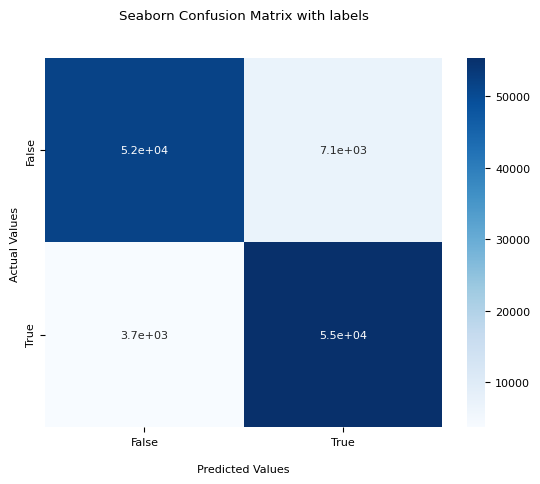

In [160]:
ax=sns.heatmap(cf_matrix,annot=True,cmap="Blues");
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

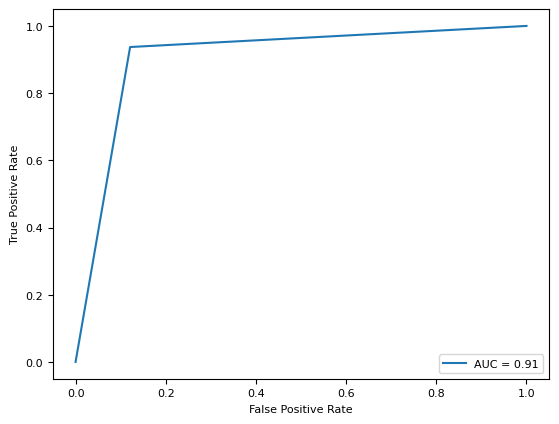

In [161]:
fpr,tpr,thresh=roc_curve(y_test_encoded,y_pred)
roc_auc=roc_auc_score(y_test_encoded,y_pred)
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc)
display.plot()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* AUC = 0.91 which says that model is able to classify the Two different Classes by 91% time Correctly.
* The More the Area Under the Curve the Better the Model

## Model Saving

In [162]:
joblib.dump(Best_model,"ML_Model.joblib")
joblib.dump(encoder,"OHE_enc.joblib")

['OHE_enc.joblib']